In [4]:
#Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# load the dataset
housing = pd.read_csv('housing.csv')

In [6]:
# check what the data looks like
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
# check the info
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# The describe method to show the summary of the numerical attributes
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

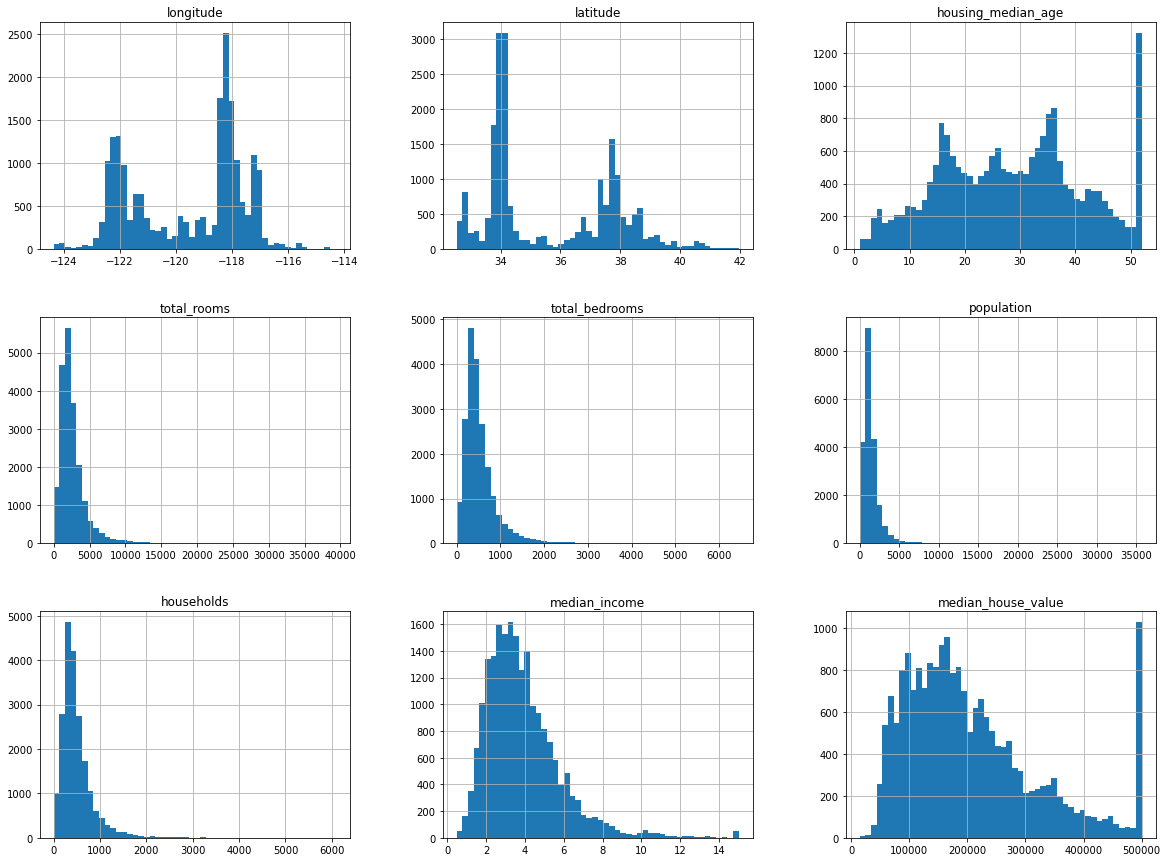

In [6]:
%matplotlib inline
# A historgram for all the numerical features
housing.hist(bins=50 , figsize=(20,15))

<AxesSubplot:>

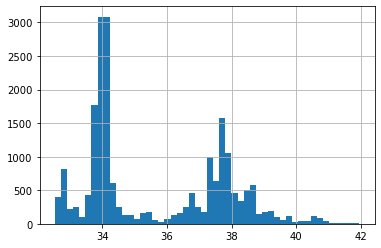

In [8]:
# hist shows the number of instances that have a given valu range
housing['latitude'].hist(bins=50)

<AxesSubplot:>

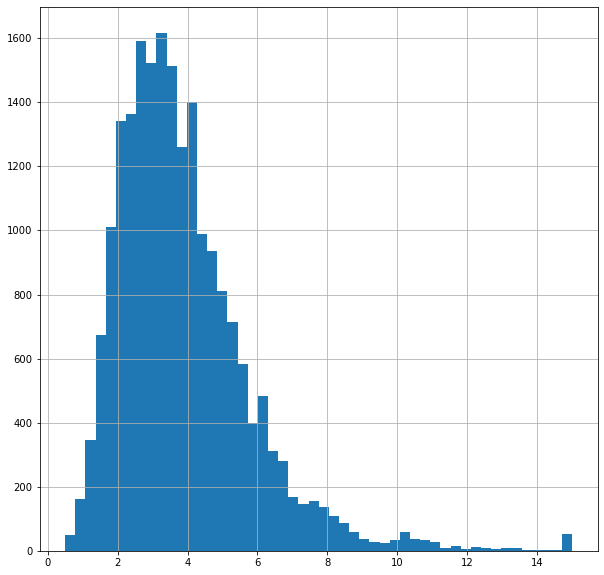

In [19]:
housing['median_income'].hist(bins=50,figsize=(10,10))

In [8]:
# In order to do stratified sampling based on the median income
# You need to turn it into categorical so that each category appear in 
# both the test and training set
housing['income_cat'] = pd.cut(housing['median_income'],
                              bins=[0.,1.5,3.0,4.5,6.0,np.inf],
                              labels=[1,2,3,4,5])

<AxesSubplot:>

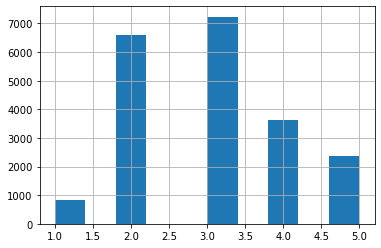

In [26]:
housing['income_cat'].hist()

In [7]:
from sklearn.model_selection import StratifiedShuffleSplit

In [9]:
# perform stratified shuffle split based on the income category
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [10]:
# check the proportion of each category
housing['income_cat'].value_counts()/ len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [11]:
# drop the income_cat since its not needed anymore
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat' , axis=1, inplace=True)

In [12]:
# create a copy of the training set for visualization
train = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

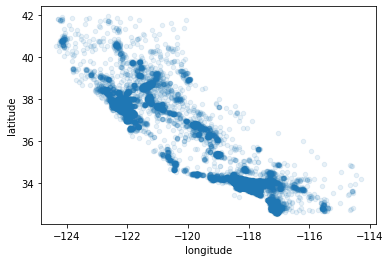

In [37]:
#
train.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

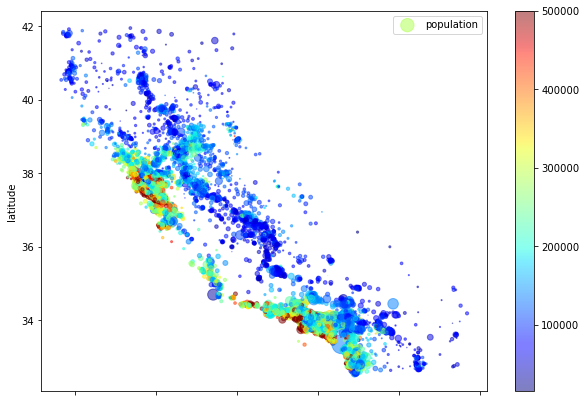

In [41]:
#The radius of each circle represents the district’s population (option s),
#and the color represents the price (option c). We will use a predefined 
#color map (option cmap) called jet, which ranges from blue (low values)
#to red (high prices):

train.plot(kind='scatter',x='longitude',y='latitude',alpha=0.5,figsize=(10,7),
            s=train['population']/100, c=train['median_house_value'],
            cmap=plt.get_cmap("jet"), label='population', colorbar=True)
plt.legend()

In [42]:
# finding the correlation between features
corr_matrix = train.corr()

In [43]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>

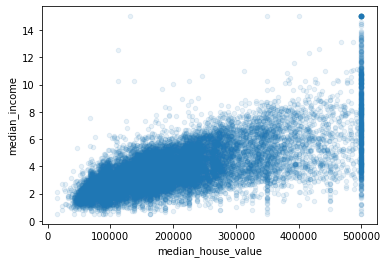

In [45]:
train.plot(kind='scatter', x='median_house_value', y='median_income',alpha=0.1)

In [13]:
#prepare your data for machine learning model
housing = strat_train_set.drop('median_house_value', axis=1)
housing_label = strat_train_set['median_house_value'].copy()

In [14]:
# To deal with missing data
from sklearn.impute import SimpleImputer

imputer =SimpleImputer(strategy='median') #create an instance

In [15]:
housing_num = housing.drop('ocean_proximity', axis =1)
imputer.fit(housing_num)
imputer.statistics_  # computes the median value 
                            #of all the numerical column

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [16]:
X = imputer.transform(housing_num) # transform the data by filling the 
    #missing  values by its median

In [17]:
# transform it back into a dataframe
housing_tr = pd.DataFrame(X ,columns=housing_num.columns)

In [18]:
housing_cat = housing[['ocean_proximity']]

In [19]:
# to transform categorical data into numbers or texts. we can use
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

In [20]:
housing_cat_encoded = encoder.fit_transform(housing_cat)

In [21]:
# Or in this case we can use
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder()

In [22]:
housing_cat_1hot = onehot.fit_transform(housing_cat)

In [23]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [24]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                                        bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [26]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])
housing_prepared = full_pipeline.fit_transform(housing)

In [27]:
# Time to try out some model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,housing_label)
some_data = housing.iloc[:5]
some_labels = housing_label.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print('Predictions: ', lin_reg.predict(some_data_prepared))
print('Actual value: ', some_labels)

Predictions:  [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
Actual value:  17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
Name: median_house_value, dtype: float64


In [28]:
# check the error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(housing_label,lin_reg.predict(housing_prepared))
rmse = np.sqrt(mse)
print(rmse)

68628.19819848923


In [29]:
# Lets try out Decision Tree
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(housing_prepared,housing_label)
pred = dtr.predict(housing_prepared)

In [30]:
mse =mean_squared_error(housing_label,pred)
rmse = np.sqrt(mse)
print(rmse)

0.0


In [31]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dtr, housing_prepared, housing_label,
                            scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [32]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [70235.67161773 65215.45293761 71000.36059174 69603.44128215
 69646.75682992 74215.55756807 71492.98814321 70929.85893455
 76220.73915577 70184.16317915]
Mean: 70874.49902399027
Standard deviation: 2760.05064637839


In [33]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_label,
             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.674001798348


In [37]:
# Try training a RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
# forest_reg = RandomForestRegressor()
# forest_reg.fit(housing_prepared, housing_label)
# forest_score = cross_val_score(forest_reg, housing_prepared, housing_label,
#                               scoring='neg_mean_squared_error', cv=10)
# forest_rmse_score = np.sqrt(-forest_score)
# display_scores(forest_rmse_score)

In [1]:
from sklearn.model_selection import GridSearchCV

In [46]:
param_grid = [
    {'n_estimators':[3,10,30,40],'max_features':[2,4,6,8,10]},
    {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]},
]

In [39]:
forest_reg = RandomForestRegressor()

In [47]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, 
                          scoring='neg_mean_squared_error',
                          return_train_score=True)

In [48]:
grid_search.fit(housing_prepared, housing_label)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8, 10],
                          'n_estimators': [3, 10, 30, 40]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [42]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [45]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

63835.389723886656 {'max_features': 2, 'n_estimators': 3}
55634.717214737924 {'max_features': 2, 'n_estimators': 10}
52858.79321620491 {'max_features': 2, 'n_estimators': 30}
60282.1991727334 {'max_features': 4, 'n_estimators': 3}
52585.95314995021 {'max_features': 4, 'n_estimators': 10}
50556.67905431884 {'max_features': 4, 'n_estimators': 30}
58674.74588753289 {'max_features': 6, 'n_estimators': 3}
52655.91022957857 {'max_features': 6, 'n_estimators': 10}
49759.5100999242 {'max_features': 6, 'n_estimators': 30}
59335.32475395059 {'max_features': 8, 'n_estimators': 3}
52146.70328463035 {'max_features': 8, 'n_estimators': 10}
50228.25176975337 {'max_features': 8, 'n_estimators': 30}
61867.101763349834 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54797.13394331282 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60077.161997742835 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52659.19511335029 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

In [49]:
feature_importance = grid_search.best_estimator_.feature_importances_

In [50]:
feature_importance

array([7.81611360e-02, 6.97902956e-02, 4.41691021e-02, 1.85722989e-02,
       1.72017656e-02, 1.82842326e-02, 1.59304010e-02, 3.41529546e-01,
       6.44578380e-02, 1.05083053e-01, 6.14301365e-02, 1.53620285e-02,
       1.37826472e-01, 1.09278145e-04, 6.58431334e-03, 5.50810281e-03])

In [52]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importance, attributes), reverse=True)

[(0.34152954602056596, 'median_income'),
 (0.13782647167258213, 'INLAND'),
 (0.10508305311163242, 'pop_per_hhold'),
 (0.07816113604335226, 'longitude'),
 (0.06979029556616141, 'latitude'),
 (0.06445783800357717, 'rooms_per_hhold'),
 (0.06143013648936073, 'bedrooms_per_room'),
 (0.04416910210702595, 'housing_median_age'),
 (0.018572298918346348, 'total_rooms'),
 (0.018284232639324077, 'population'),
 (0.01720176561817753, 'total_bedrooms'),
 (0.01593040099339548, 'households'),
 (0.015362028523466048, '<1H OCEAN'),
 (0.006584313340569849, 'NEAR BAY'),
 (0.005508102807360989, 'NEAR OCEAN'),
 (0.0001092781451016714, 'ISLAND')]

In [64]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')